# Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.

In [133]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option('display.max_columns', 500)

In [9]:
df = pd.read_csv("CarPrice_Assignment.csv")
df.shape

(205, 26)

In [10]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
df2 = df.copy()

In [12]:
df2.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [14]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [15]:
# Extracting only car company name from the column carname and replacing it with original car name
df['CarName'] = df['CarName'].str.split().str[0]

In [16]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [17]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [18]:
# Function to do univariate plotting of all the variables

def univariate(df):
    cols_int = list(df.select_dtypes("int64").columns) # extracting integer columns
    #int_cols = cols_int # copy it in another list which we can alter and this will finally become our int continuous var list
    cols_cat = list(df.select_dtypes(["object","category"]).columns) # cats
    cat_cols = cols_cat  # cats
    cols_float = list(df.select_dtypes("float64").columns) # float
    #float_cols = cols_float  # float
    cont_cols = []
    cats_anomaly = [] # cats which have alot of unique values
    if len(cols_int)>0:
        for i in range(len(cols_int)):
            unique = list(df[cols_int[i]].unique())
            if len(unique)<=11:
                cat_cols.append(cols_int[i])
                # int_cols.remove(cols_int[i])
            else:
                cont_cols.append(cols_int[i])
    if len(cols_float)>0:
        for i in range(len(cols_float)):
            
            if len(list(df[cols_float[i]].unique()))<=11:
                cat_cols.append(cols_float[i])
                #float_cols.remove(cols_float[i])
            else:
                cont_cols.append(cols_float[i])
    if len(cols_cat)>0:
        for i in range(len(cols_cat)):
            if ((len(list(df[cols_cat[i]].unique())))>=15):
                #cat_cols.remove(cols_cat[i])
                cats_anomaly.append(cols_cat[i])
    # Finding the size of figure and matrix
    if len(cat_cols)>0:
        if len(cat_cols)%3==0:
            a = len(cat_cols)//3
        else:
            a = 1 + len(cat_cols)//3
        b = a*5
        # plotting the cat vars
        plt.figure(figsize = (15,b))
        for i in range(len(cat_cols)):
            plt.subplot(a,3,i+1)
            sns.countplot(df[cat_cols[i]].dropna())
    s1 = plt.show()
    # Finding the size of figure and matrix
    if len(cont_cols)>0:
        if len(cont_cols)%3==0:
            a = len(cont_cols)//3
        else:
            a = 1 + len(cont_cols)//3
        b = a*5
        # plotting the cont vars
        plt.figure(figsize = (15,b))
        for i in range(len(cont_cols)):
            plt.subplot(a,3,i+1)
            sns.distplot(df[cont_cols[i]].dropna())
    s2 = plt.show()
    
    return print(cats_anomaly), s1, s2 

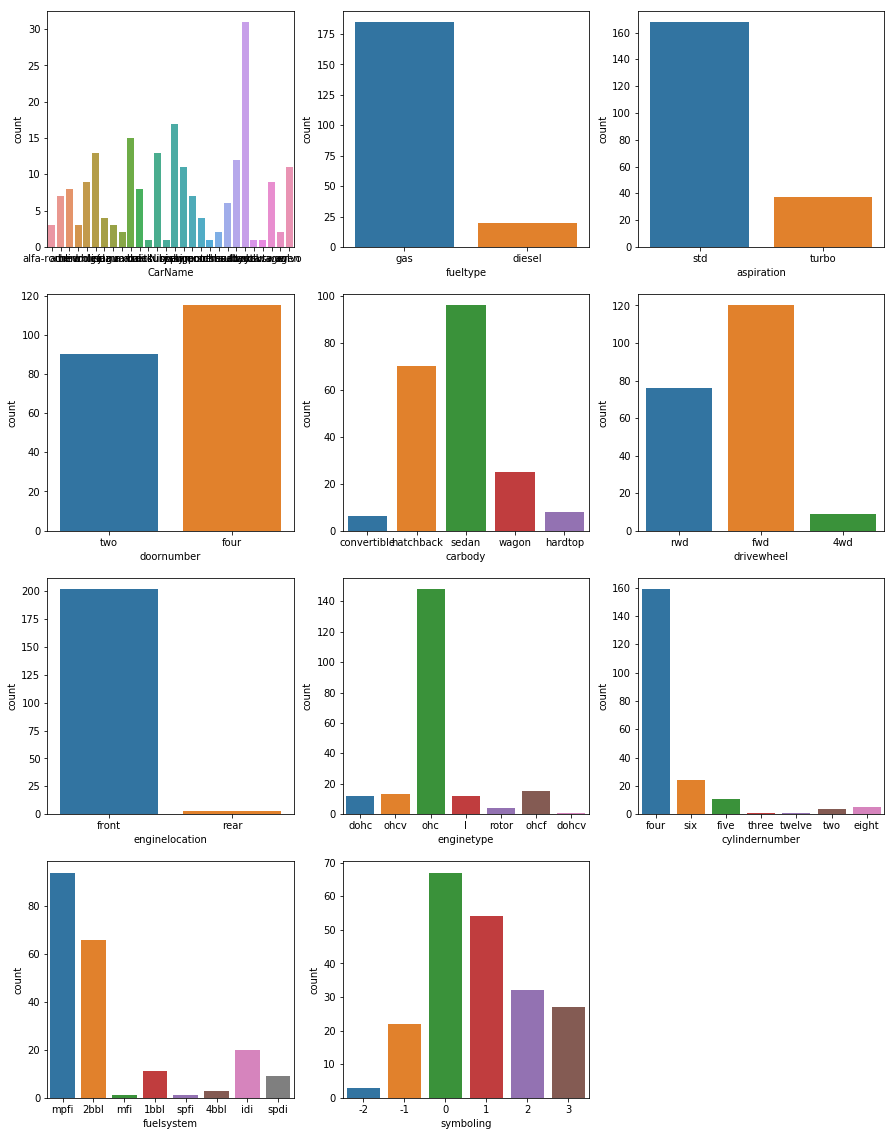

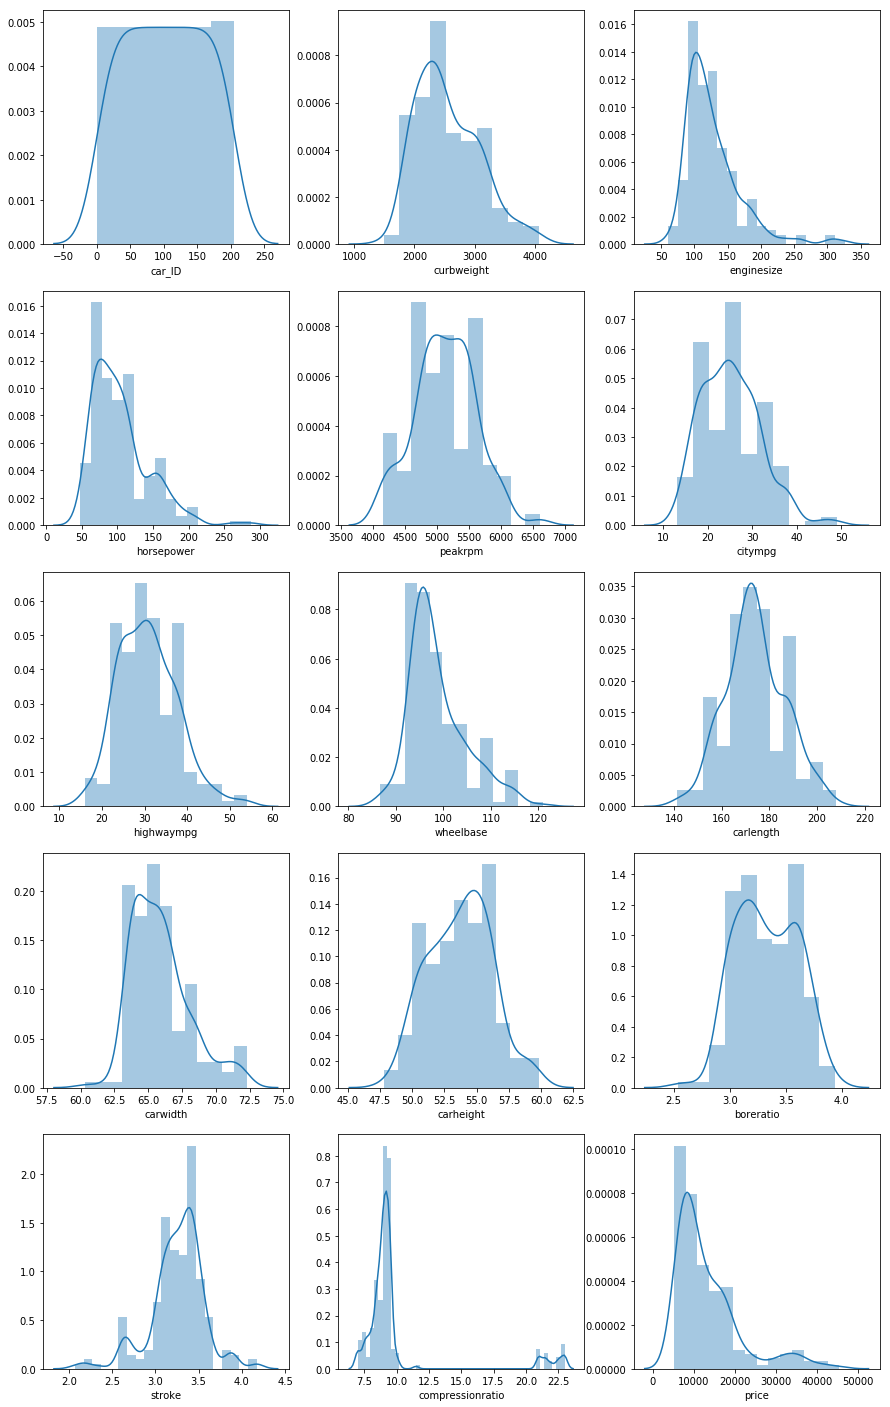

(None, None, None)

['CarName']


In [19]:
univariate(df)

1. Most of the vehicles runs on gas. Only a few are diesel based.
- Lesser number of vehicles are turbocharged.
- Cars with door count two are slighly less than door count of four.
- Very few number of vehicles are 4 wheel drive.
- Front engine cars are present mostly. Because most commercial vehicles have front engine.

In [20]:
# label encoding

# fueltype
df['fueltype'] = df['fueltype'].map({'gas':1,'diesel':0})

# aspiration
df['aspiration'] = df['aspiration'].map({'std':1,'turbo':0})

# doornumber
df['doornumber'] = df['doornumber'].map({'four':4,'two':2})

# engine location
df['enginelocation'] = df['enginelocation'].map({'front':1,'rear':0})

# no of cylinders
df['cylindernumber'] = df['cylindernumber'].map({'four':4,'six':6,'five':5,'three':3,'twelve':12,'two':2,'eight':8})

In [21]:
df.head(2)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,1,1,2,convertible,rwd,1,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,1,1,2,convertible,rwd,1,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


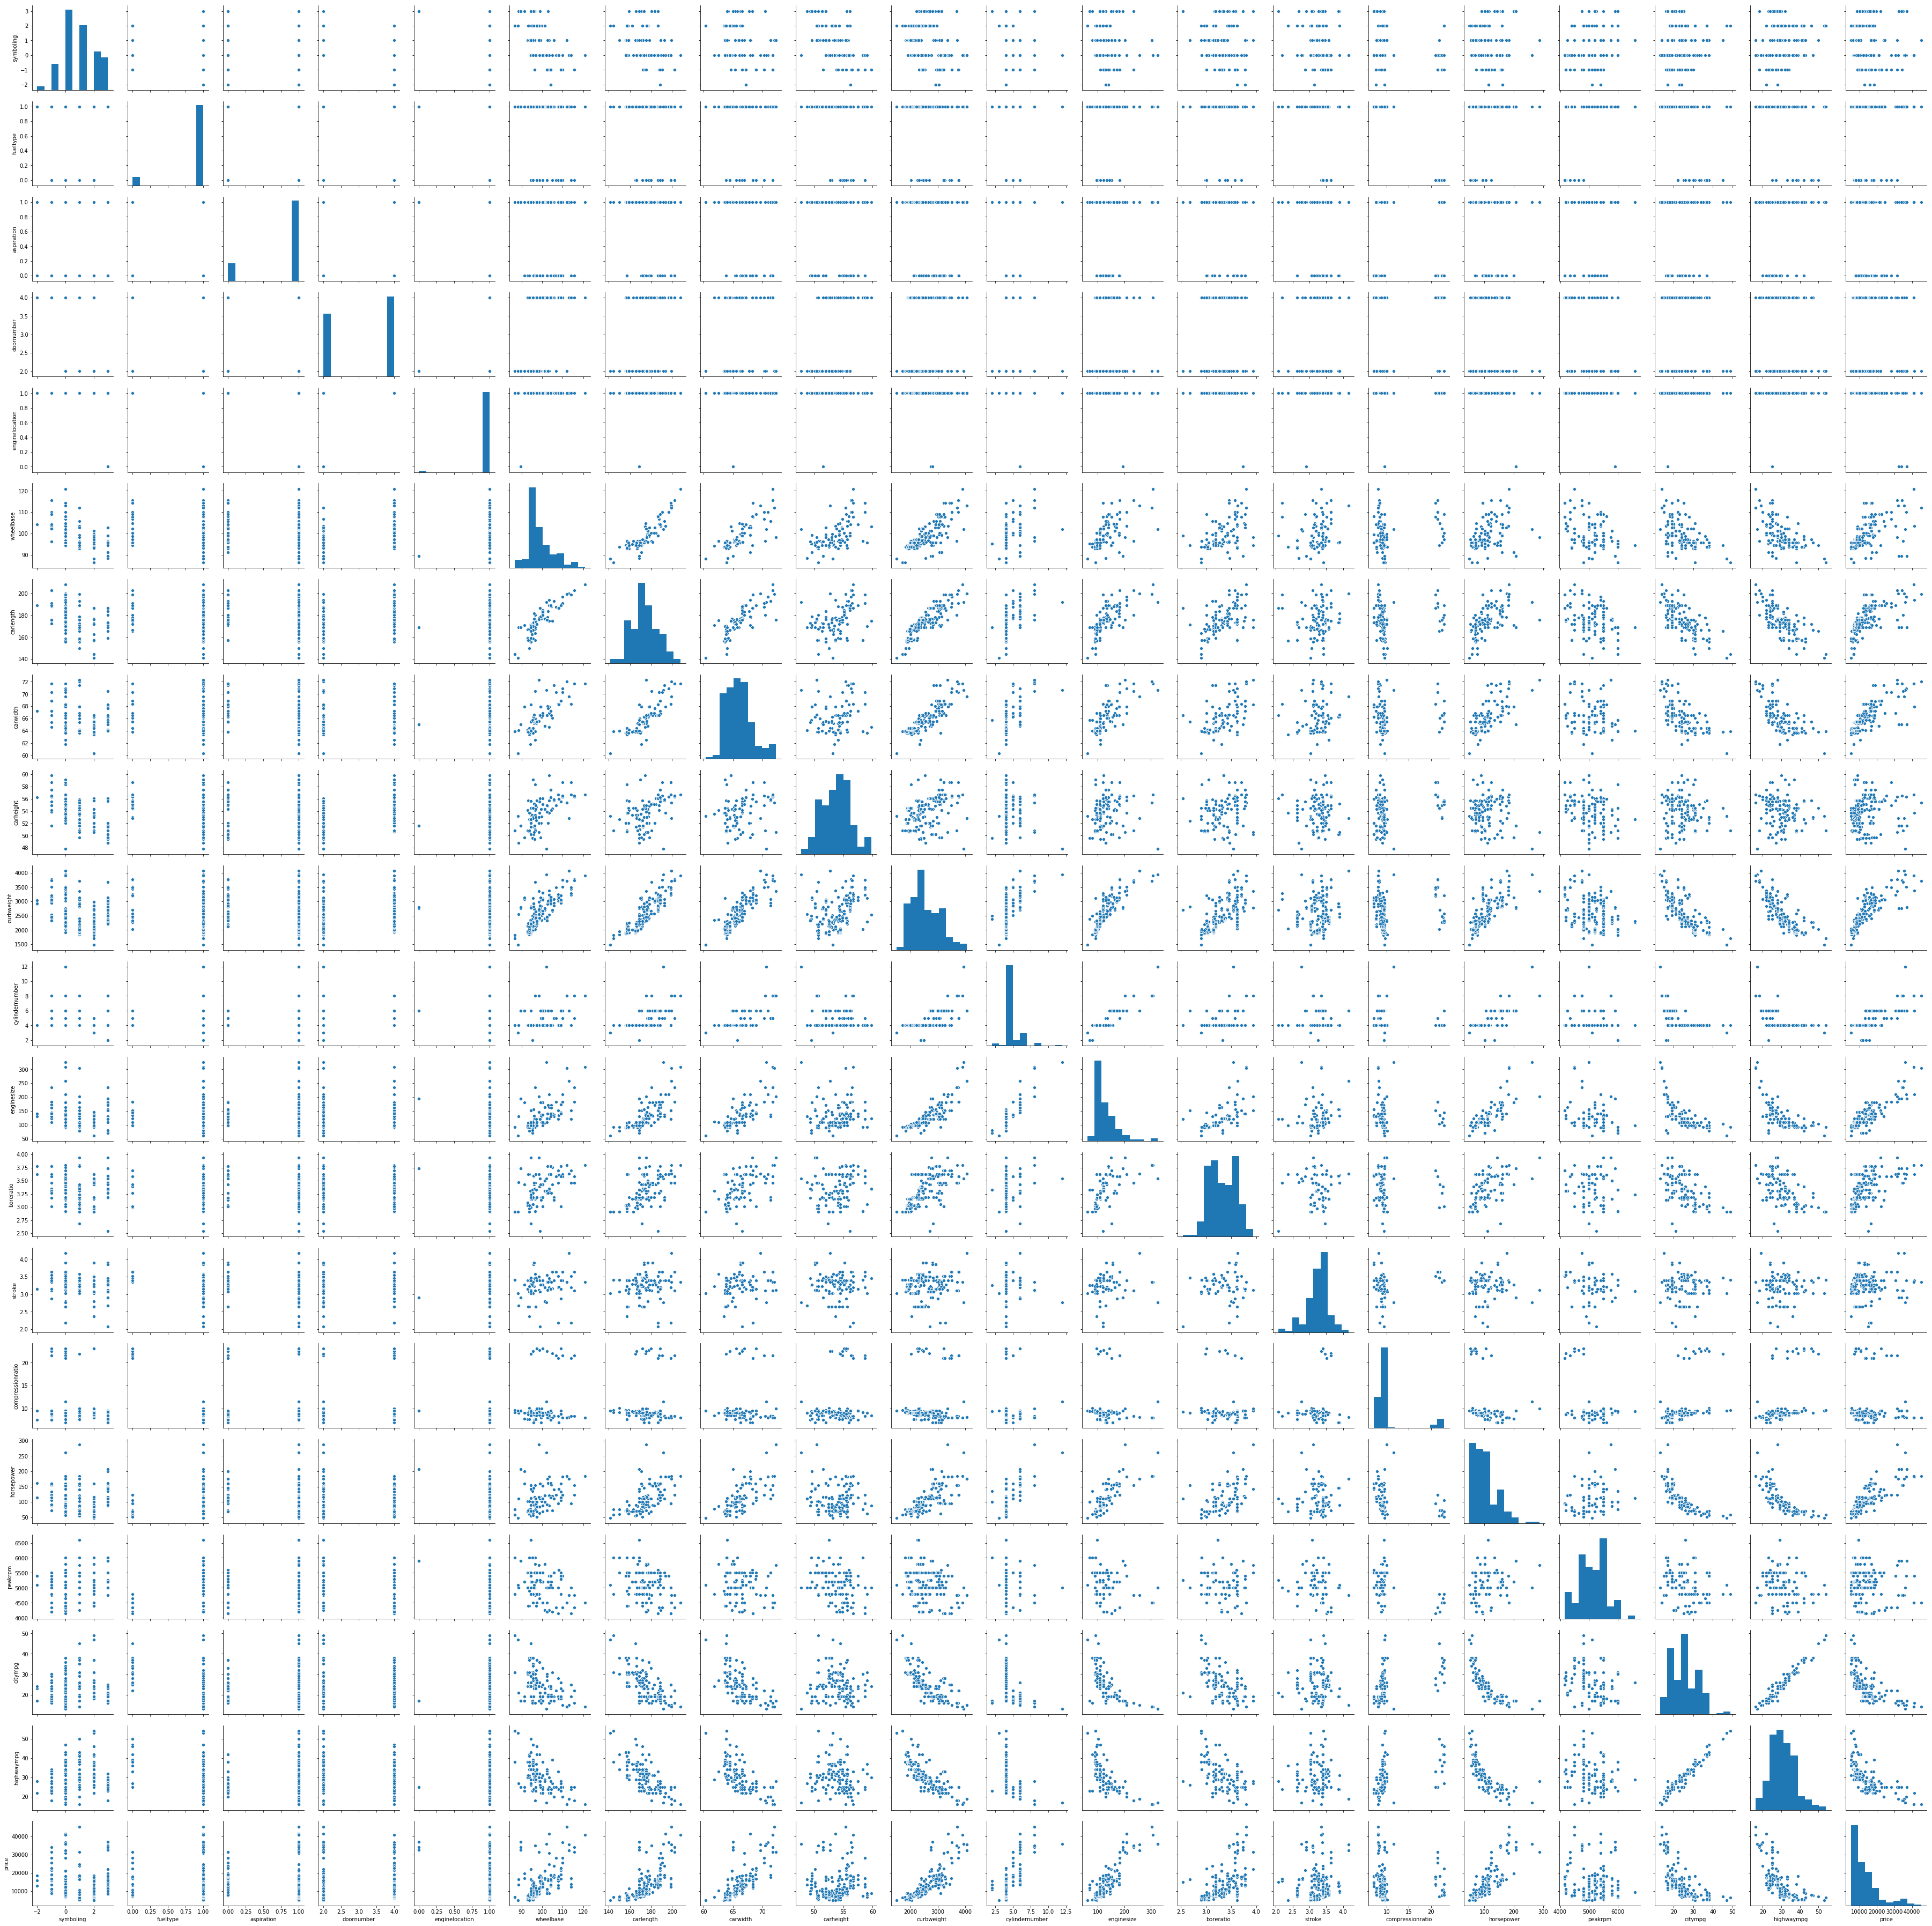

In [21]:
# Visualising the data
sns.pairplot(df.drop(columns = 'car_ID'))
plt.show()

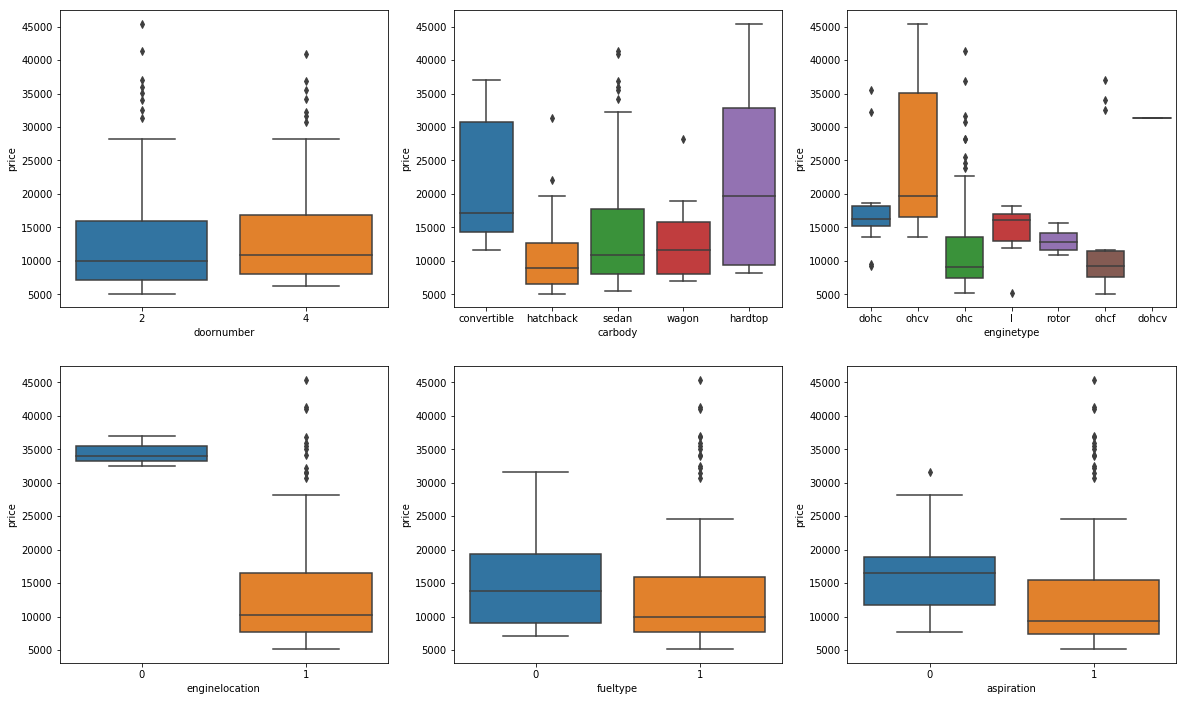

In [41]:
# Boxplots

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'carbody', y = 'price', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'enginetype', y = 'price', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'enginelocation', y = 'price', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'fueltype', y = 'price', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'aspiration', y = 'price', data = df)
plt.show()

# dropping car_name as it is a specific information and variable is redundant

In [58]:
df.drop(columns = 'CarName', inplace = True)

In [59]:
# Onehotencoding
df3 = pd.get_dummies(df, drop_first = True)

In [60]:
df3.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,1,1,2,1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,3,1,1,2,1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,1,1,1,2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,4,2,1,1,4,1,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,5,2,1,1,4,1,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [61]:
# dropping Car_ID as this will have no effect on the price
df3.drop(columns = 'car_ID', inplace = True)

In [62]:
len(df3.columns)

39

In [63]:
df3.tail(2)

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
203,-1,0,0,4,1,109.1,188.8,68.9,55.5,3217,6,145,3.01,3.40,23.0,106,4800,26,27,22470.0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
204,-1,1,0,4,1,109.1,188.8,68.9,55.5,3062,4,141,3.78,3.15,9.5,114,5400,19,25,22625.0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0


# Train Test Split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(df3.drop(columns = 'price'), df3['price'], test_size = 0.3, random_state = 42)

# Scaling

In [65]:
# Standardisation
scaler = StandardScaler()
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 
            'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

X_test[num_vars] = scaler.transform(X_test[num_vars])

C:\Users\Dharmendra\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Dharmendra\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Dharmendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


# Feature Selection

In [66]:
# Feature Selection using RFE

lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr, 15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=15, step=1, verbose=0)

In [67]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('symboling', False, 20),
 ('fueltype', True, 1),
 ('aspiration', False, 2),
 ('doornumber', False, 21),
 ('enginelocation', True, 1),
 ('wheelbase', False, 8),
 ('carlength', False, 7),
 ('carwidth', True, 1),
 ('carheight', False, 18),
 ('curbweight', True, 1),
 ('cylindernumber', False, 15),
 ('enginesize', True, 1),
 ('boreratio', False, 4),
 ('stroke', False, 6),
 ('compressionratio', True, 1),
 ('horsepower', False, 12),
 ('peakrpm', False, 9),
 ('citympg', False, 16),
 ('highwaympg', False, 17),
 ('carbody_hardtop', False, 19),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 22),
 ('drivewheel_rwd', True, 1),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', True, 1),
 ('enginetype_ohc', False, 5),
 ('enginetype_ohcf', False, 13),
 ('enginetype_ohcv', False, 3),
 ('enginetype_rotor', True, 1),
 ('fuelsystem_2bbl', False, 14),
 ('fuelsystem_4bbl', False, 11),
 ('fuelsystem_idi', True, 1),
 ('fuelsystem_mfi', F

In [68]:
# Selected Features
cols = X_train.columns[rfe.support_]
cols

Index(['fueltype', 'enginelocation', 'carwidth', 'curbweight', 'enginesize',
       'compressionratio', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_rotor', 'fuelsystem_idi', 'fuelsystem_spdi'],
      dtype='object')

In [99]:
X_train_rfe = X_train[cols]
X_test_rfe = X_test[cols]

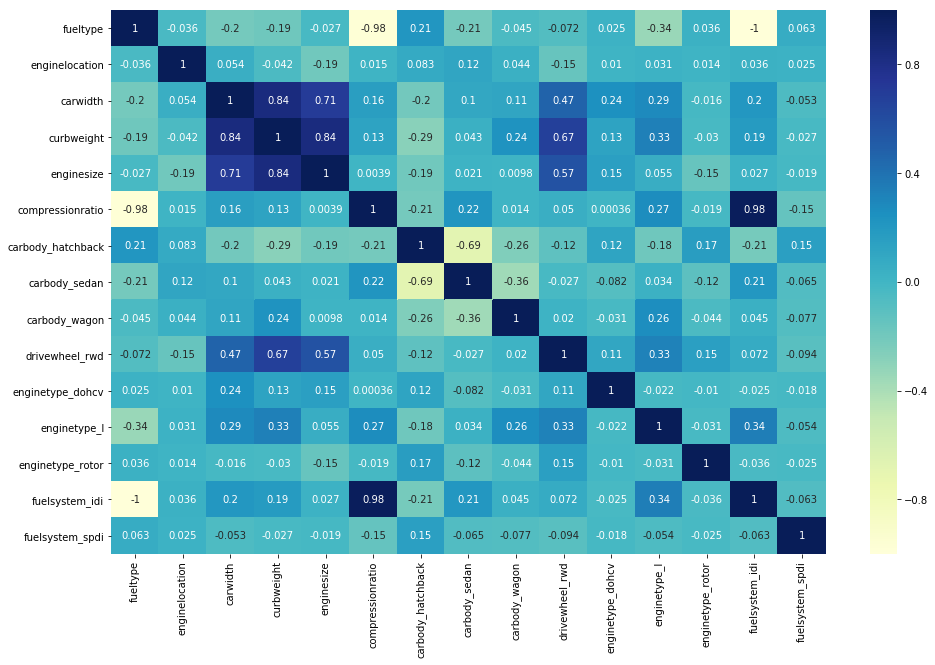

In [71]:
# Correlation

plt.figure(figsize = (16,10))
sns.heatmap(X_train_rfe.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

# Few of the columns are higly correlated
- carwidth, curbweight, enginesize, compressionratio-fuelsystem_idi

In [100]:
# Base model
model = sm.OLS(y_train, sm.add_constant(X_train_rfe)).fit()

model.summary()

C:\Users\Dharmendra\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     93.27
Date:                Sat, 05 Oct 2019   Prob (F-statistic):           5.32e-60
Time:                        02:13:07   Log-Likelihood:                -1311.8
No. Observations:                 143   AIC:                             2654.
Df Residuals:                     128   BIC:                             2698.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.106e+04   2077.757     10.134      0.000    1.69e+04    2.52e+04
fueltype           6687.0414   2108.782      3.171      0.002    2514.456    1.09e+04
enginelocation    -1.301e+04   2046.241     -6.358      0.000   -1.71e+04   -8961.125
carwidth           2375.5638    426.656      5.568      0.000    1531.351    3219.776
curbweight         2139.3432    722.331      2.962      0.004     710.088    3568.598
enginesize         2401.3486    519.092      4.626      0.000    1374.237    3428.460
compressionratio  -2376.8152   1527.136     -1.556      0.122   -5398.515     644.884
carbody_hatchback -3196.0955   1071.000     -2.984      0.003   -5315.251   -1076.940
carbody_sedan     -1879.0965   1049.235     -1.791      0.076   -3955.187     196.994
carbody_wagon     -4327.5150   1263.427     -3.425      0.001   -6827.422   -1827.608
drivewheel_rwd     1661.2210    678.304      2.449      0.016     319.081    3003.361
enginetype_dohcv   3640.8465   2687.198      1.355      0.178   -1676.233    8957.927
enginetype_l      -4905.5719   1125.856     -4.357      0.000   -7133.270   -2677.874
enginetype_rotor   4953.5990   1953.230      2.536      0.012    1088.799    8818.399
fuelsystem_idi     1.437e+04   3676.322      3.908      0.000    7093.784    2.16e+04
fuelsystem_spdi   -2152.4755   1233.339     -1.745      0.083   -4592.848     287.897
==============================================================================
Omnibus:                        1.424   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.491   Jarque-Bera (JB):                1.009
Skew:                           0.073   Prob(JB):                        0.604
Kurtosis:                       3.385   Cond. No.                     4.58e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.3e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [101]:
# VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i ) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif

,Features,VIF
0,fueltype,86.47
1,enginelocation,1.36
2,carwidth,4.28
3,curbweight,12.27
4,enginesize,6.34
5,compressionratio,54.86
6,carbody_hatchback,5.95
7,carbody_sedan,6.47
8,carbody_wagon,3.93
9,drivewheel_rwd,2.56


##### drop fuel type first because it is very high vif

In [102]:
X_train_rfe.drop(columns = 'fueltype', inplace = True)

In [103]:
# BUilding the model again

model = sm.OLS(y_train, sm.add_constant(X_train_rfe)).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     93.27
Date:                Sat, 05 Oct 2019   Prob (F-statistic):           5.32e-60
Time:                        02:14:15   Log-Likelihood:                -1311.8
No. Observations:                 143   AIC:                             2654.
Df Residuals:                     128   BIC:                             2698.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.774e+04   2003.178     13.849      0.000    2.38e+04    3.17e+04
enginelocation    -1.301e+04   2046.241     -6.358      0.000   -1.71e+04   -8961.125
carwidth           2375.5638    426.656      5.568      0.000    1531.351    3219.776
curbweight         2139.3432    722.331      2.962      0.004     710.088    3568.598
enginesize         2401.3486    519.092      4.626      0.000    1374.237    3428.460
compressionratio  -2376.8152   1527.136     -1.556      0.122   -5398.515     644.884
carbody_hatchback -3196.0955   1071.000     -2.984      0.003   -5315.251   -1076.940
carbody_sedan     -1879.0965   1049.235     -1.791      0.076   -3955.187     196.994
carbody_wagon     -4327.5150   1263.427     -3.425      0.001   -6827.422   -1827.608
drivewheel_rwd     1661.2210    678.304      2.449      0.016     319.081    3003.361
enginetype_dohcv   3640.8465   2687.198      1.355      0.178   -1676.233    8957.927
enginetype_l      -4905.5719   1125.856     -4.357      0.000   -7133.270   -2677.874
enginetype_rotor   4953.5990   1953.230      2.536      0.012    1088.799    8818.399
fuelsystem_idi     7680.9735   5622.058      1.366      0.174   -3443.229    1.88e+04
fuelsystem_spdi   -2152.4755   1233.339     -1.745      0.083   -4592.848     287.897
==============================================================================
Omnibus:                        1.424   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.491   Jarque-Bera (JB):                1.009
Skew:                           0.073   Prob(JB):                        0.604
Kurtosis:                       3.385   Cond. No.                         47.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
# VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i ) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif

,Features,VIF
0,enginelocation,30.96
1,carwidth,4.24
2,curbweight,11.23
3,enginesize,5.46
4,compressionratio,52.98
5,carbody_hatchback,8.75
6,carbody_sedan,12.37
7,carbody_wagon,4.27
8,drivewheel_rwd,3.83
9,enginetype_dohcv,1.19


###### Dropping fuelsystem_idi first as VIF is much high

In [105]:
X_train_rfe.drop(columns = 'fuelsystem_idi', inplace = True)

In [106]:
# BUilding the model again

model = sm.OLS(y_train, sm.add_constant(X_train_rfe)).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     99.63
Date:                Sat, 05 Oct 2019   Prob (F-statistic):           1.31e-60
Time:                        02:15:25   Log-Likelihood:                -1312.9
No. Observations:                 143   AIC:                             2654.
Df Residuals:                     129   BIC:                             2695.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.828e+04   1971.130     14.346      0.000    2.44e+04    3.22e+04
enginelocation    -1.279e+04   2046.532     -6.248      0.000   -1.68e+04   -8737.372
carwidth           2381.5731    428.064      5.564      0.000    1534.637    3228.509
curbweight         2402.4989    698.510      3.439      0.001    1020.479    3784.519
enginesize         2263.9540    510.965      4.431      0.000    1252.998    3274.910
compressionratio   -313.0790    225.258     -1.390      0.167    -758.757     132.599
carbody_hatchback -3264.9167   1073.402     -3.042      0.003   -5388.668   -1141.165
carbody_sedan     -2030.4543   1046.868     -1.940      0.055   -4101.709      40.801
carbody_wagon     -4489.4344   1262.074     -3.557      0.001   -6986.479   -1992.390
drivewheel_rwd     1527.1802    673.421      2.268      0.025     194.799    2859.561
enginetype_dohcv   2911.0808   2642.406      1.102      0.273   -2316.983    8139.145
enginetype_l      -4406.3332   1068.476     -4.124      0.000   -6520.339   -2292.327
enginetype_rotor   4614.8311   1943.924      2.374      0.019     768.731    8460.932
fuelsystem_spdi   -1312.9155   1072.931     -1.224      0.223   -3435.737     809.906
==============================================================================
Omnibus:                        2.758   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.252   Jarque-Bera (JB):                2.663
Skew:                           0.098   Prob(JB):                        0.264
Kurtosis:                       3.639   Cond. No.                         22.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
# VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i ) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif

,Features,VIF
0,enginelocation,25.08
1,carwidth,4.24
2,curbweight,10.67
3,enginesize,5.37
4,compressionratio,1.18
5,carbody_hatchback,8.74
6,carbody_sedan,12.30
7,carbody_wagon,4.26
8,drivewheel_rwd,3.80
9,enginetype_dohcv,1.14


- Dropping engine_dohcv as pvalue is high

In [108]:
X_train_rfe.drop(columns = 'enginetype_dohcv', inplace = True)

In [109]:
# BUilding the model again

model = sm.OLS(y_train, sm.add_constant(X_train_rfe)).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     107.7
Date:                Sat, 05 Oct 2019   Prob (F-statistic):           2.24e-61
Time:                        02:16:33   Log-Likelihood:                -1313.5
No. Observations:                 143   AIC:                             2653.
Df Residuals:                     130   BIC:                             2692.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.826e+04   1972.651     14.323      0.000    2.44e+04    3.22e+04
enginelocation    -1.282e+04   2047.989     -6.260      0.000   -1.69e+04   -8768.158
carwidth           2503.2098    413.920      6.048      0.000    1684.318    3322.101
curbweight         2300.1303    692.871      3.320      0.001     929.367    3670.893
enginesize         2286.7780    510.964      4.475      0.000    1275.897    3297.659
compressionratio   -309.8763    225.424     -1.375      0.172    -755.851     136.099
carbody_hatchback -3165.8603   1070.508     -2.957      0.004   -5283.732   -1047.989
carbody_sedan     -2006.9399   1047.511     -1.916      0.058   -4079.314      65.435
carbody_wagon     -4420.0778   1261.538     -3.504      0.001   -6915.881   -1924.275
drivewheel_rwd     1603.5835    670.391      2.392      0.018     277.295    2929.872
enginetype_l      -4484.0196   1067.022     -4.202      0.000   -6594.996   -2373.044
enginetype_rotor   4514.1993   1943.372      2.323      0.022     669.471    8358.928
fuelsystem_spdi   -1322.0191   1073.781     -1.231      0.220   -3446.367     802.328
==============================================================================
Omnibus:                        1.812   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.404   Jarque-Bera (JB):                1.468
Skew:                           0.048   Prob(JB):                        0.480
Kurtosis:                       3.487   Cond. No.                         22.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
# VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i ) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif

,Features,VIF
0,enginelocation,25.03
1,carwidth,3.96
2,curbweight,10.48
3,enginesize,5.36
4,compressionratio,1.18
5,carbody_hatchback,8.68
6,carbody_sedan,12.29
7,carbody_wagon,4.25
8,drivewheel_rwd,3.75
9,enginetype_l,1.67


- Dropping fuelsystem_spdi

In [111]:
X_train_rfe.drop(columns = 'fuelsystem_spdi', inplace = True)

In [112]:
# BUilding the model again

model = sm.OLS(y_train, sm.add_constant(X_train_rfe)).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     116.8
Date:                Sat, 05 Oct 2019   Prob (F-statistic):           4.26e-62
Time:                        02:17:45   Log-Likelihood:                -1314.4
No. Observations:                 143   AIC:                             2653.
Df Residuals:                     131   BIC:                             2688.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.815e+04   1974.675     14.256      0.000    2.42e+04    3.21e+04
enginelocation    -1.277e+04   2051.680     -6.226      0.000   -1.68e+04   -8715.448
carwidth           2558.8770    412.252      6.207      0.000    1743.344    3374.410
curbweight         2165.9283    685.589      3.159      0.002     809.670    3522.187
enginesize         2324.0159    511.071      4.547      0.000    1312.995    3335.037
compressionratio   -271.9446    223.748     -1.215      0.226    -714.572     170.683
carbody_hatchback -3276.3686   1068.836     -3.065      0.003   -5390.782   -1161.955
carbody_sedan     -2038.3457   1049.260     -1.943      0.054   -4114.032      37.340
carbody_wagon     -4339.5901   1262.321     -3.438      0.001   -6836.763   -1842.418
drivewheel_rwd     1725.7427    664.312      2.598      0.010     411.575    3039.910
enginetype_l      -4503.2797   1069.006     -4.213      0.000   -6618.029   -2388.531
enginetype_rotor   4588.5972   1946.252      2.358      0.020     738.446    8438.749
==============================================================================
Omnibus:                        1.584   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.453   Jarque-Bera (JB):                1.192
Skew:                           0.058   Prob(JB):                        0.551
Kurtosis:                       3.432   Cond. No.                         22.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
# VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i ) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif

,Features,VIF
0,enginelocation,25.00
1,carwidth,3.91
2,curbweight,10.24
3,enginesize,5.35
4,compressionratio,1.16
5,carbody_hatchback,8.61
6,carbody_sedan,12.28
7,carbody_wagon,4.24
8,drivewheel_rwd,3.68
9,enginetype_l,1.67


- Compressionratio has high pvalue remove it

In [114]:
X_train_rfe.drop(columns = 'compressionratio', inplace = True)

In [115]:
# BUilding the model again

model = sm.OLS(y_train, sm.add_constant(X_train_rfe)).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     127.9
Date:                Sat, 05 Oct 2019   Prob (F-statistic):           7.60e-63
Time:                        02:18:52   Log-Likelihood:                -1315.2
No. Observations:                 143   AIC:                             2652.
Df Residuals:                     132   BIC:                             2685.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.803e+04   1975.629     14.186      0.000    2.41e+04    3.19e+04
enginelocation    -1.263e+04   2052.021     -6.156      0.000   -1.67e+04   -8572.446
carwidth           2525.0884    412.057      6.128      0.000    1709.999    3340.177
curbweight         2104.3603    684.950      3.072      0.003     749.462    3459.259
enginesize         2394.8429    508.655      4.708      0.000    1388.673    3401.013
carbody_hatchback -3245.4857   1070.464     -3.032      0.003   -5362.969   -1128.002
carbody_sedan     -2117.1991   1049.143     -2.018      0.046   -4192.508     -41.890
carbody_wagon     -4287.3401   1263.867     -3.392      0.001   -6787.395   -1787.286
drivewheel_rwd     1775.6551    664.239      2.673      0.008     461.725    3089.585
enginetype_l      -4732.8469   1054.087     -4.490      0.000   -6817.936   -2647.758
enginetype_rotor   4600.3052   1949.743      2.359      0.020     743.520    8457.090
==============================================================================
Omnibus:                        1.953   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.377   Jarque-Bera (JB):                1.564
Skew:                           0.111   Prob(JB):                        0.457
Kurtosis:                       3.462   Cond. No.                         22.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
# VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i ) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif

,Features,VIF
0,enginelocation,24.98
1,carwidth,3.89
2,curbweight,10.20
3,enginesize,5.29
4,carbody_hatchback,8.61
5,carbody_sedan,12.22
6,carbody_wagon,4.24
7,drivewheel_rwd,3.67
8,enginetype_l,1.61
9,enginetype_rotor,1.23


- Dropping engine location because of very high VIF

In [117]:
X_train_rfe.drop(columns = 'enginelocation', inplace = True)

In [121]:
# BUilding the model again

model = sm.OLS(y_train, sm.add_constant(X_train_rfe)).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     108.0
Date:                Sat, 05 Oct 2019   Prob (F-statistic):           1.08e-56
Time:                        02:20:42   Log-Likelihood:                -1333.2
No. Observations:                 143   AIC:                             2686.
Df Residuals:                     133   BIC:                             2716.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.756e+04   1138.240     15.431      0.000    1.53e+04    1.98e+04
carwidth           2308.7505    464.015      4.976      0.000    1390.946    3226.555
curbweight         1558.1811    767.618      2.030      0.044      39.863    3076.499
enginesize         3059.4467    561.790      5.446      0.000    1948.249    4170.645
carbody_hatchback -5613.3961   1129.039     -4.972      0.000   -7846.591   -3380.201
carbody_sedan     -4372.0874   1111.132     -3.935      0.000   -6569.864   -2174.311
carbody_wagon     -6270.5614   1381.250     -4.540      0.000   -9002.621   -3538.502
drivewheel_rwd     1989.3351    749.706      2.653      0.009     506.445    3472.226
enginetype_l      -4190.5485   1187.177     -3.530      0.001   -6538.738   -1842.359
enginetype_rotor   5256.8198   2200.329      2.389      0.018     904.655    9608.985
==============================================================================
Omnibus:                       11.410   Durbin-Watson:                   2.145
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               22.357
Skew:                           0.294   Prob(JB):                     1.40e-05
Kurtosis:                       4.846   Cond. No.                         16.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
# VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i ) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif

,Features,VIF
0,carwidth,3.89
1,curbweight,9.91
2,enginesize,5.13
3,carbody_hatchback,1.62
4,carbody_sedan,1.53
5,carbody_wagon,1.28
6,drivewheel_rwd,3.24
7,enginetype_l,1.61
8,enginetype_rotor,1.23


### Final model

In [122]:
# BUilding the final model

model = sm.OLS(y_train, sm.add_constant(X_train_rfe)).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     108.0
Date:                Sat, 05 Oct 2019   Prob (F-statistic):           1.08e-56
Time:                        02:21:49   Log-Likelihood:                -1333.2
No. Observations:                 143   AIC:                             2686.
Df Residuals:                     133   BIC:                             2716.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.756e+04   1138.240     15.431      0.000    1.53e+04    1.98e+04
carwidth           2308.7505    464.015      4.976      0.000    1390.946    3226.555
curbweight         1558.1811    767.618      2.030      0.044      39.863    3076.499
enginesize         3059.4467    561.790      5.446      0.000    1948.249    4170.645
carbody_hatchback -5613.3961   1129.039     -4.972      0.000   -7846.591   -3380.201
carbody_sedan     -4372.0874   1111.132     -3.935      0.000   -6569.864   -2174.311
carbody_wagon     -6270.5614   1381.250     -4.540      0.000   -9002.621   -3538.502
drivewheel_rwd     1989.3351    749.706      2.653      0.009     506.445    3472.226
enginetype_l      -4190.5485   1187.177     -3.530      0.001   -6538.738   -1842.359
enginetype_rotor   5256.8198   2200.329      2.389      0.018     904.655    9608.985
==============================================================================
Omnibus:                       11.410   Durbin-Watson:                   2.145
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               22.357
Skew:                           0.294   Prob(JB):                     1.40e-05
Kurtosis:                       4.846   Cond. No.                         16.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
# Parameters on which price matters are
list(zip(X_train_rfe.columns, model.params[1:]))

[('carwidth', 2308.7504642761537),
 ('curbweight', 1558.1811153422748),
 ('enginesize', 3059.446651470077),
 ('carbody_hatchback', -5613.396129275342),
 ('carbody_sedan', -4372.087402704109),
 ('carbody_wagon', -6270.561376616506),
 ('drivewheel_rwd', 1989.3351418509608),
 ('enginetype_l', -4190.548472731),
 ('enginetype_rotor', 5256.819764414897)]

# Residual analysis of train prediction

In [125]:
y_pred_train = model.predict(sm.add_constant(X_train_rfe))

C:\Users\Dharmendra\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Text(0.5, 0, 'Errors')

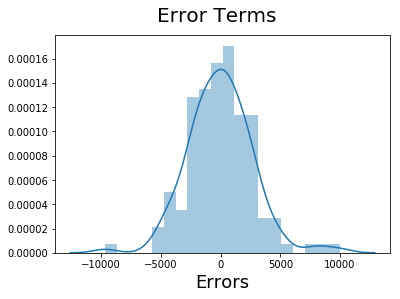

In [126]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

- These errors are normally distributed mostly.

# Prediction using final model

In [128]:
X_test_final = X_test[X_train_rfe.columns]
y_pred_test = model.predict(sm.add_constant(X_test_final))

Text(0, 0.5, 'y_pred')

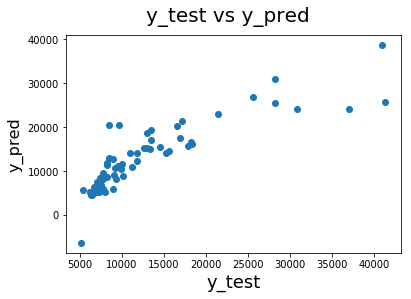

In [130]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_test)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

#### Parameters impact on price

In [144]:
# Parameters on which price matters are
a = list(zip(X_train_rfe.columns, round(model.params[1:], 2)))
a

[('carwidth', 2308.75),
 ('curbweight', 1558.18),
 ('enginesize', 3059.45),
 ('carbody_hatchback', -5613.4),
 ('carbody_sedan', -4372.09),
 ('carbody_wagon', -6270.56),
 ('drivewheel_rwd', 1989.34),
 ('enginetype_l', -4190.55),
 ('enginetype_rotor', 5256.82)]

# Equation of Price for scaled values
Price = 1.756e+04 + 2308.75xcarwidth + 1558.18xcurbweight + 3059.45xenginesize - 5613.4xcarbody_hatchback - 4372.09xcarbody_sedan - 6270.56xcarbody_wagon + 1989.34xdrivewheel_rwd - 4190.55xenginetype_l + 5256.82xenginetype_rotor

#### R-Squared

In [132]:
print("R-Squared on the test predictions is", round(r2_score(y_test,y_pred_test), 2))

R-Squared on the test predictions is 0.73


### 0.73 R- Squared is good enough.